# Driving Simulator

Some nice functions to plot self driving cars autopilot model predictions on input image feed, as shown [here.](https://github.com/nfsrules/SelfDriving)

Functionalities included:
    - Plot vehicle CAN annotation on frames.
    - Generate .AVI videos from model predictions vs target. 
    
.AVI videos can be easily converted to gif.

In [2]:
import h5py
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.models import load_model

from visual_functions import *
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## Load Pre-trained Model

In [3]:
model = load_model('trained_models/autopilot_inet_mse.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 318, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 158, 318, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 158, 318, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 157, 24)       38424     
_________________________________________________________________
batch_normalization_2 (Batch (None, 77, 157, 24)       96        
_________________________________________________________________
activation_2 (Activation)    (None, 77, 157, 24)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 77, 36)        21636     
__________

## Load CAN dataframe

In [4]:
df = pd.read_csv('training_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,cam_index,steering_angle,speed,accel,brake,stop_flag
0,4593.0,23.000000,26.022835,0.773637,0.0,1.0
1,4595.0,19.827596,26.094446,0.601005,0.0,1.0
2,4597.0,19.000000,26.173665,0.664587,0.0,1.0
3,4599.0,19.000000,26.237341,0.698118,0.0,1.0
4,4601.0,19.000000,26.321907,0.625089,0.0,1.0


## Load Comma.ai images 

In [5]:
# Loading images from h5 file
filename = '/Users/nelsonfernandez/Desktop/Autonomous_Steering/comma-dataset/camera/2016-01-30--11-24-51.h5'
camera = h5py.File(filename,'r')

# Get keys 
for field in camera.keys():
    print(field)

imgs = camera.get('X')
imgs = np.array(imgs)

print('Loaded images = ', imgs.shape[0])
print('Image shape = ', np.shape(imgs)[1:])

X
Loaded images =  52722
Image shape =  (3, 160, 320)


## Custom visualizations

1) Raw images with CAN annotations

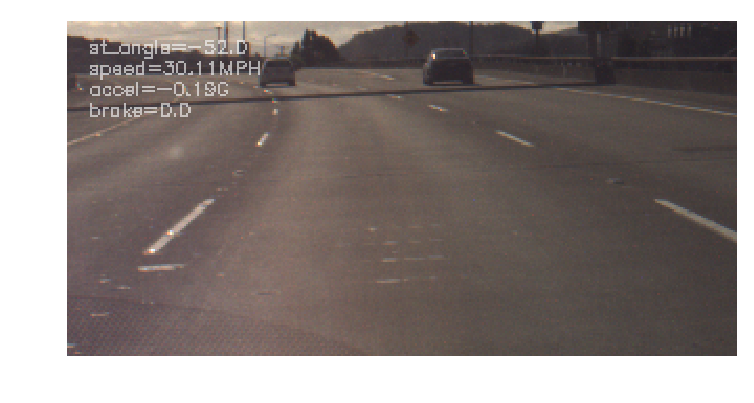

In [6]:
play_raw_data(df, imgs, f_init=0,f_end=100)

2) Driving Simulator

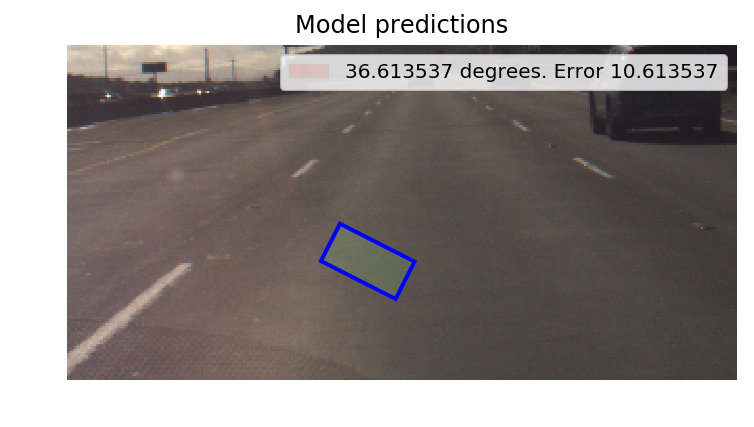

In [7]:
# Simulator returns rendered images as numpy arrays
frames = simulator(model, df, imgs, f_init=0, f_end=30)

## Save video

In [16]:
# Create video writer
writer = cv2.VideoWriter("sample_video.avi", 
                         cv2.VideoWriter_fourcc(*"MJPG"), 
                         10,(333,165))

for frame in tqdm(frames):
    writer.write(frame[:,:,:3][...,::-1]) # Numpy tricks to convert array to openCV images
    
writer.release()

100%|██████████| 200/200 [00:00<00:00, 747.63it/s]
